In [227]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as gb
from sklearn.svm import SVC
# from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [133]:
# reading data from csv
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = train.copy()

In [172]:
# data[["Survived"]].sum()
women  = data[data["Sex"] == "female"]["Survived"]
women.sum()

233

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
# checking the percentage of missing data
round(((train.isnull().sum())/train.shape[0]) * 100, 2)
# len(train)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

<AxesSubplot:>

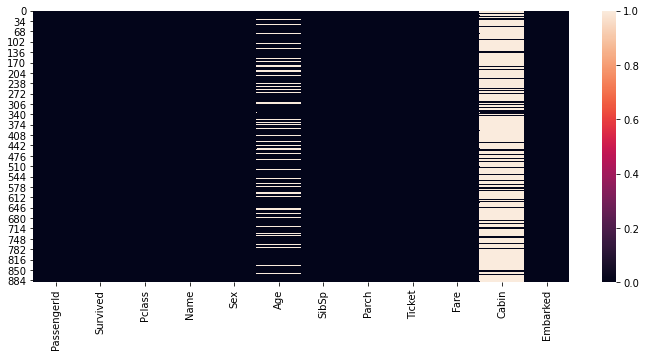

In [9]:
# visualizing missing data
plt.figure(figsize=(12,5))
sns.heatmap(train.isnull())

In [10]:
# checking the distribution of survival in percentage
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


><li> Analyse age column - fill outliers, fill missing values</li>
><li> Analyse fare column - outliers, </li>

<AxesSubplot:xlabel='Age'>

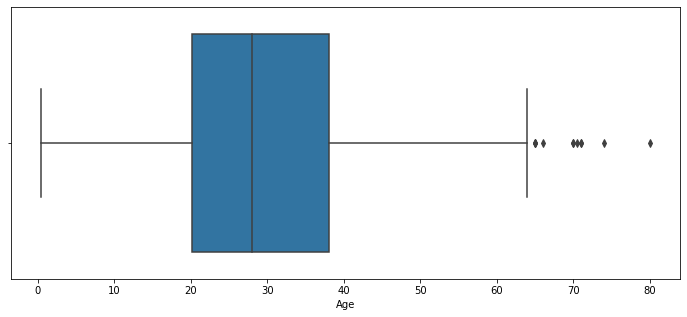

In [12]:
# visualisation without fillna
plt.figure(figsize=(12,5))
sns.boxplot(data=train , x="Age", )

In [13]:
train.groupby("Pclass").mean()["Age"]

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [14]:
age_mean = round(data["Age"].mean())
age_mean

30

In [15]:
data["Age"]= data["Age"].fillna(age_mean)

In [16]:
(data["Age"].mean())

29.758888888888887

<AxesSubplot:xlabel='Age'>

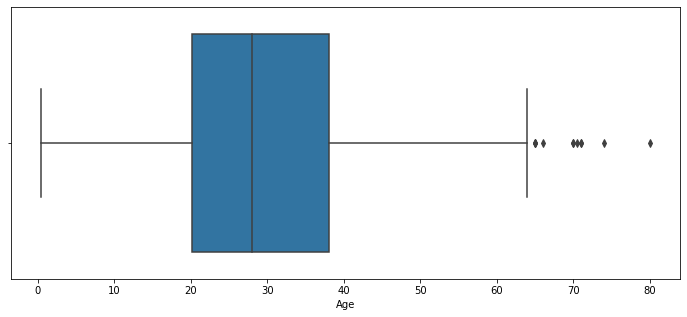

In [17]:
# visualisation with fillna
plt.figure(figsize=(12,5))
sns.boxplot(data=train , x="Age", )

<AxesSubplot:xlabel='Age', ylabel='Count'>

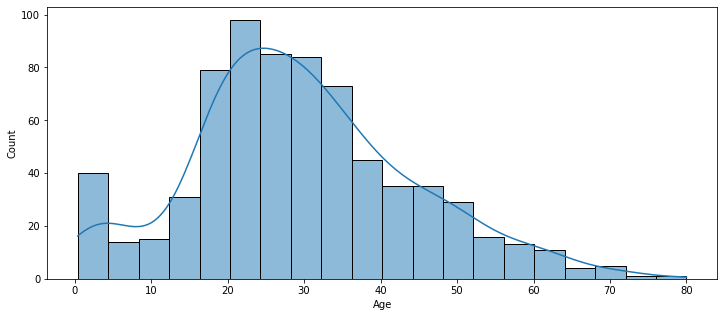

In [18]:
plt.figure(figsize=(12,5))
sns.histplot(data=train , x="Age",kde=True )

In [19]:
# removing outliers with interquatile range

In [20]:
Q1 = np.percentile(data["Age"], 25)
Q3 = np.percentile(data["Age"], 75)

In [21]:
Q1

22.0

In [22]:
IQR = Q3-Q1

step = 1.5*IQR

ul = Q3 + step
l = Q1 - step

In [23]:
print(ul,l
)

54.5 2.5


In [24]:
data[data["Age"]<l]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,NaN,Q
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.00,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [25]:
data.groupby("Survived")['Sex'].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [26]:
# value = {"male":0, "female":1}
# data["Sex"].replace(value, inplace=True)

In [27]:
# row_drop = np.where(data["Age"]>65)
# row_drop

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033019,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.070657,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.329727,0.083081,0.018443,-0.549500
Age,0.033019,-0.070657,-0.329727,1.000000,-0.232440,-0.180330,0.090632
SibSp,-0.057527,-0.035322,0.083081,-0.232440,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180330,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.090632,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Fare', ylabel='Count'>

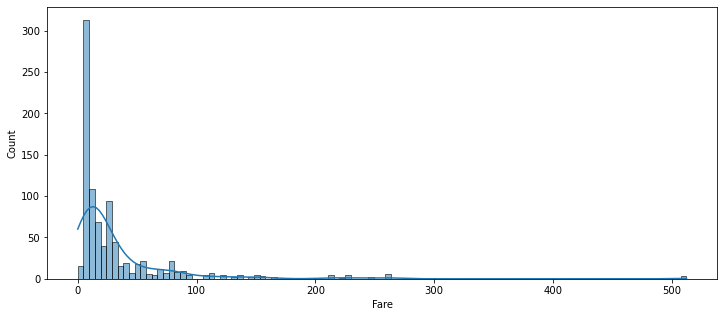

In [30]:
plt.figure(figsize=(12,5))
sns.histplot(data=train , x="Fare",kde=True )

In [31]:
data.groupby("Pclass")["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [32]:
data["Embarked"].fillna(method="ffill", inplace=True)

In [33]:
data.groupby("Embarked")["Survived"].sum()

Embarked
C     94
Q     31
S    217
Name: Survived, dtype: int64

In [34]:
data.groupby("Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [35]:
SibSp = data.groupby("SibSp")["Survived"].value_counts()
SibSp
# sns.countplot(x="SibSp", data=data, hue="Survived")

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<AxesSubplot:xlabel='SibSp'>

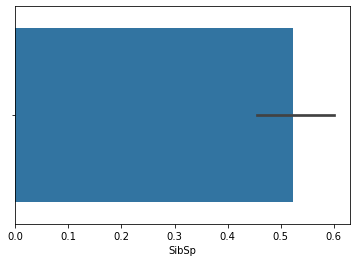

In [36]:
sns.barplot(x="SibSp", data=data)

In [37]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [38]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [39]:
# dropping unwanted column
drop_cols = ["Name","Cabin","PassengerId","Ticket"]
data.drop(drop_cols, axis=1, inplace=True)

In [40]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [41]:
# # replacing and encoding values in the column
# value = {"S":0, "C":1, "Q":2}
# data["Embarked"].replace(value, inplace=True)

#using get dummies due to heirachy

data2 = pd.get_dummies(data, columns=["Sex","Embarked"], drop_first=True)

<AxesSubplot:>

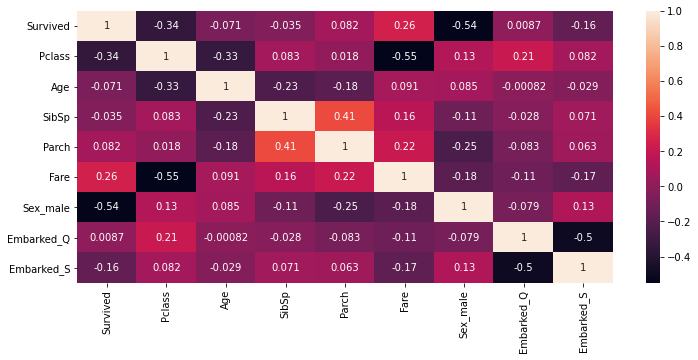

In [42]:
# plotting heatmap of corr
plt.figure(figsize=(12,5))
sns.heatmap(data2.corr(), annot=True)

In [43]:
data2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Feature Selection

In [65]:
X = data2.drop("Survived", axis=1 )
y = data2.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

In [66]:
print(X_train.shape)
print(y_train.shape)

(712, 8)
(712,)


# Model Selection

In [67]:
model = LogisticRegression()

In [68]:
model.fit(X_train, y_train)


C:\Users\user1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred = model.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       118
           1       0.79      0.79      0.79        61

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [71]:
model1 = LogisticRegression(max_iter=1500)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       118
           1       0.81      0.79      0.80        61

    accuracy                           0.87       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



In [73]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
yt_pred = model1.predict(X_train)
print(classification_report(y_train,yt_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       431
           1       0.74      0.71      0.72       281

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712



C:\Users\user1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Feature Selection

In [88]:
X = data2.drop(["Survived","Parch","Embarked_Q","SibSp"], axis=1 )
y = data2.Survived

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=11)

In [89]:
model2 = LogisticRegression()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.89      0.89       118
           1       0.78      0.77      0.78        61

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



# Working on the test file

In [111]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [112]:
ntest = test.drop(drop_cols, axis=1)
ntest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [113]:
ntest["Age"].fillna(age_mean, inplace=True)

In [114]:
ntest["Fare"].fillna(ntest["Fare"].mean(), inplace=True)

In [115]:
ntest.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [116]:
ntest = pd.get_dummies(ntest,columns=["Sex", "Embarked"], drop_first=True)

In [117]:
ntest.head(1)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0


In [118]:
X_val = ntest.drop(["Parch","Embarked_Q","SibSp"], axis=1 )




In [119]:
X_val.head(1)

,Pclass,Age,Fare,Sex_male,Embarked_S
0,3,34.5,7.8292,1,0


In [120]:
X_train.head(1)

,Pclass,Age,Fare,Sex_male,Embarked_S
333,3,16.0,18.0,1,1


In [122]:
y_pred = model2.predict(X_val)
# print(classification_report(X_val, X_pred))

# Exporting to Kaggle

In [124]:
predictdf = test[["PassengerId"]]
predictdf.head(2)

,PassengerId
0,892
1,893


In [126]:
predictdf["Survived"] = y_pred

<ipython-input-126-1b71d8a2d1ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictdf["Survived"] = y_pred


In [127]:
predictdf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# converting to CSV

In [5]:
predictdf.to_csv("titanic1.csv",index=False)

NameError: name 'predictdf' is not defined

In [131]:
pd.read_csv("titanic1.csv").head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


# Using a different model - Random forrest

In [134]:
model_forest = RandomForestClassifier()

In [135]:
model_forest.fit(X_train, y_train)

RandomForestClassifier()

In [136]:
y_pred_new = model_forest.predict(X_test)

In [137]:
y_pred_new

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [140]:
print(classification_report(y_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       118
           1       0.81      0.75      0.78        61

    accuracy                           0.85       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



C:\Users\user1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Survived'>

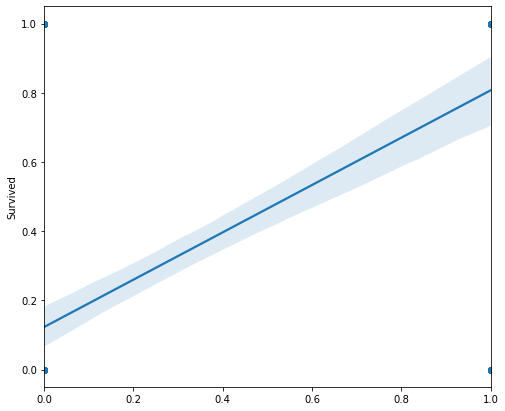

In [144]:
plt.figure(figsize=(8,7))
sns.regplot(y_pred_new , y_test)

### installing xgboost

In [147]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [148]:
# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.1


 # Using xgboost

In [152]:
from xgboost import XGBClassifier

In [4]:
# fit model no training data
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, y_train)

NameError: name 'XGBClassifier' is not defined

In [1]:
model_xgboost.fit(X_train, y_train)

NameError: name 'model_xgboost' is not defined

In [156]:
y_pred_xgboost = model_xgboost.predict(X_test)

In [158]:
print(classification_report(y_test,y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       118
           1       0.82      0.75      0.79        61

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



# importing Catboost

In [175]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [185]:
from catboost import CatBoostClassifier

# Using catboost

In [186]:
model_cat = CatBoostClassifier()

In [187]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.008911
0:	learn: 0.6876840	total: 20.1ms	remaining: 20s
1:	learn: 0.6833545	total: 28.8ms	remaining: 14.4s
2:	learn: 0.6778819	total: 36.6ms	remaining: 12.2s
3:	learn: 0.6731293	total: 44.5ms	remaining: 11.1s
4:	learn: 0.6683617	total: 48.8ms	remaining: 9.71s
5:	learn: 0.6631930	total: 54.4ms	remaining: 9.02s
6:	learn: 0.6593012	total: 59.7ms	remaining: 8.47s
7:	learn: 0.6539425	total: 64.2ms	remaining: 7.96s
8:	learn: 0.6486688	total: 68.6ms	remaining: 7.56s
9:	learn: 0.6436986	total: 72ms	remaining: 7.13s
10:	learn: 0.6397055	total: 74.1ms	remaining: 6.66s
11:	learn: 0.6354156	total: 77.6ms	remaining: 6.39s
12:	learn: 0.6308895	total: 81.6ms	remaining: 6.2s
13:	learn: 0.6272507	total: 85.3ms	remaining: 6s
14:	learn: 0.6227670	total: 88.9ms	remaining: 5.84s
15:	learn: 0.6190201	total: 91.4ms	remaining: 5.62s
16:	learn: 0.6153588	total: 93.7ms	remaining: 5.42s
17:	learn: 0.6116498	total: 96.5ms	remaining: 5.27s
18:	learn: 0.6079000	total: 99.8ms	remaining: 5.15s


In [188]:
y_pred_cat = model_cat.predict(X_test)

In [189]:
# print(classification_report(y_test,y_pred_cat))
y_pred_cat

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [190]:
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       118
           1       0.88      0.72      0.79        61

    accuracy                           0.87       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.87      0.87       179



In [218]:
X = data2.drop(["Survived","Parch","Embarked_Q","SibSp"], axis=1 )
y = data2.Survived

X_traina, X_testa, y_traina, y_testa = train_test_split(X,y, test_size=0.3, random_state=75)

# Using a function for KNN and SVC

# calling 

In [219]:
s_model = SVC()
k_model = KNeighborsClassifier()

In [220]:
def model_fun (model, X_traina=X_traina, y_traina=y_traina, X_testa=X_testa):
    model.fit(X_traina, y_traina)
    y_preda = model.predict(X_testa)
    return y_preda
    

In [221]:
s_pred = model_fun(s_model)
print(classification_report(y_testa, s_pred))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       175
           1       0.57      0.31      0.40        93

    accuracy                           0.68       268
   macro avg       0.64      0.59      0.59       268
weighted avg       0.66      0.68      0.65       268



In [222]:
k_pred = model_fun(k_model)
print(classification_report(y_testa, k_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       175
           1       0.57      0.55      0.56        93

    accuracy                           0.70       268
   macro avg       0.67      0.67      0.67       268
weighted avg       0.70      0.70      0.70       268



In [225]:
error_rate = []
for i in range(1, 30):
    K_model = KNeighborsClassifier(n_neighbors=i)
    k_model.fit(X_train, y_train)
    k_pred = k_model.predict(X_test)
    error_rate.append(np.mean(k_pred != y_test))

Text(0, 0.5, 'Error_Rate')

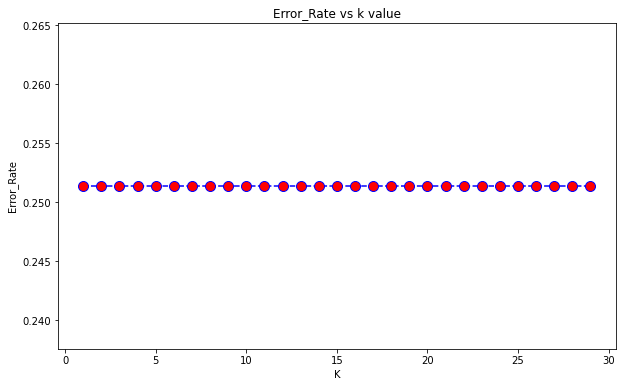

In [226]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, color="blue", linestyle="dashed", marker='o',
        markerfacecolor="red", markersize=10)
plt.title("Error_Rate vs k value")
plt.xlabel("K")
plt.ylabel("Error_Rate")